Member's names:
- Đỗ Tuấn Kiệt
- Đặng Cao Đạt

# Task 2

## Part 1

### Statiscal Analysis

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from keras.preprocessing import image
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import gdown
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
gdown.download('https://drive.google.com/uc?id=1ZYdt0zN4LjWqP3cQDblNhXjeohcryY5H',
                'Womens Clothing E-Commerce Reviews.csv',
                quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ZYdt0zN4LjWqP3cQDblNhXjeohcryY5H
To: /content/Womens Clothing E-Commerce Reviews.csv
100%|██████████| 8.48M/8.48M [00:00<00:00, 26.9MB/s]


'Womens Clothing E-Commerce Reviews.csv'

In [ ]:
# Load the dataset
data_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

data_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
# Perform statistical analysis
# Get the summary statistics of the dataframe
summary = data_df.describe()

# Print the summary statistics
print(summary)

        Clothing ID           Age        Rating  Recommended IND  \
count  23486.000000  23486.000000  23486.000000     23486.000000   
mean     918.118709     43.198544      4.196032         0.822362   
std      203.298980     12.279544      1.110031         0.382216   
min        0.000000     18.000000      1.000000         0.000000   
25%      861.000000     34.000000      4.000000         1.000000   
50%      936.000000     41.000000      5.000000         1.000000   
75%     1078.000000     52.000000      5.000000         1.000000   
max     1205.000000     99.000000      5.000000         1.000000   

       Positive Feedback Count  
count             23486.000000  
mean                  2.535936  
std                   5.702202  
min                   0.000000  
25%                   0.000000  
50%                   1.000000  
75%                   3.000000  
max                 122.000000  


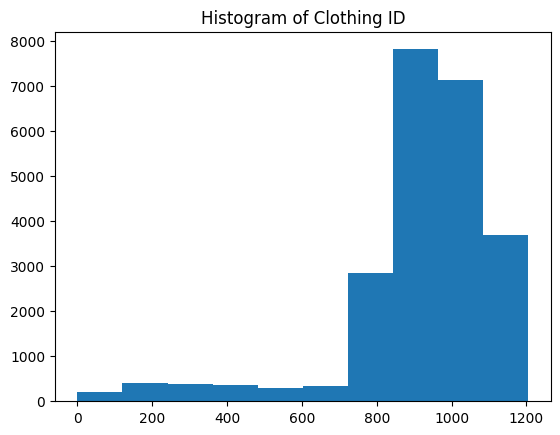

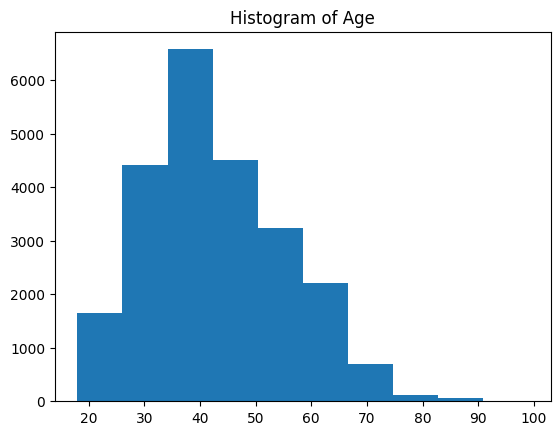

Skipped Title due to non-numeric data
Skipped Review Text due to non-numeric data


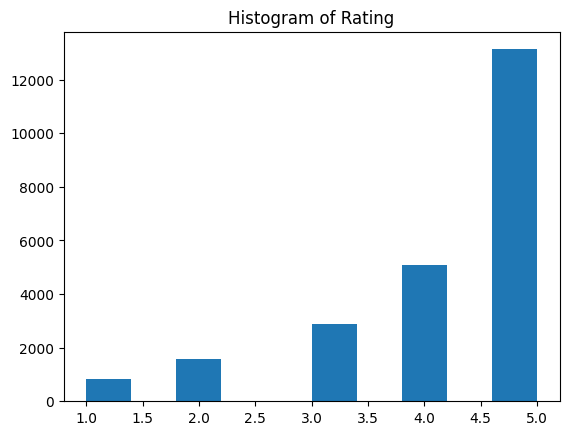

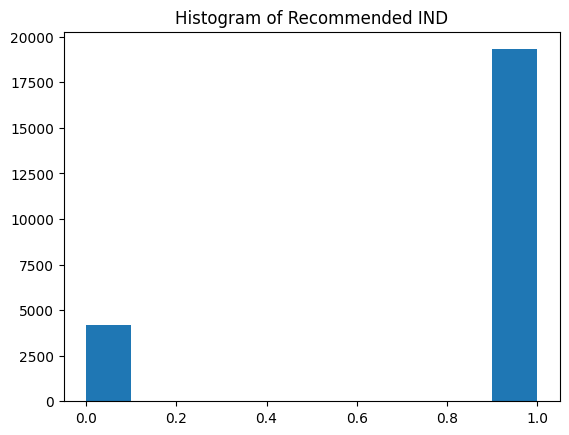

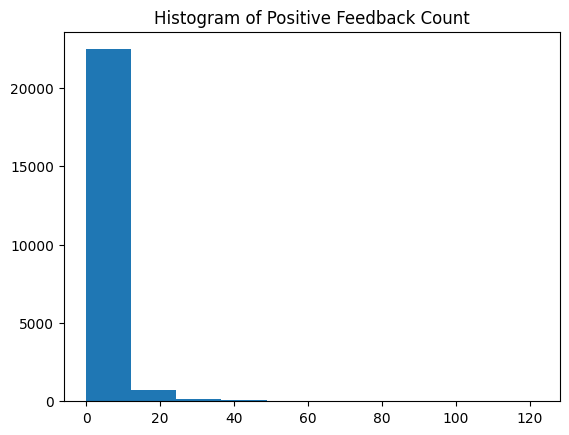

Skipped Division Name due to non-numeric data
Skipped Department Name due to non-numeric data
Skipped Class Name due to non-numeric data


<ipython-input-5-774a0cac6aad>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(), annot=True)


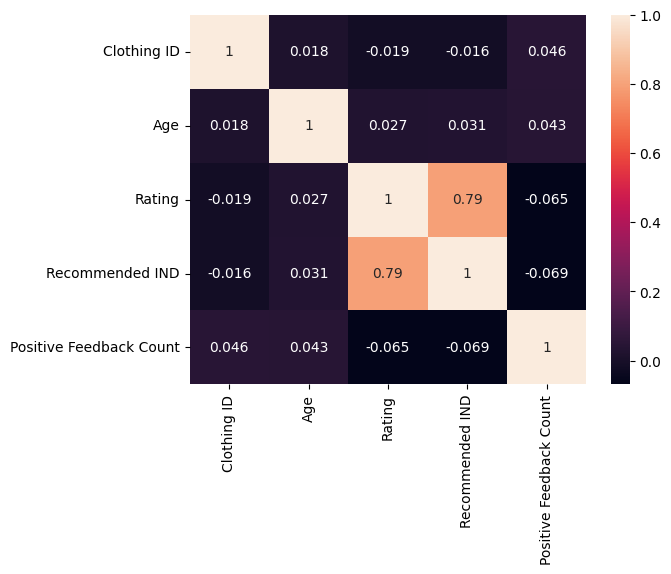

In [ ]:
# Creating graphs for visualization
# Loop through all columns in the DataFrame
for column in data_df.columns:
    # Check if the column data type is numeric
    if pd.api.types.is_numeric_dtype(data_df[column]):
        # Create a histogram for the column
        plt.hist(data_df[column].dropna())
        plt.title(f'Histogram of {column}')
        plt.show()
    else:
        print(f'Skipped {column} due to non-numeric data')

# Create a correlation heatmap after looping through all features
sns.heatmap(data_df.corr(), annot=True)
plt.show()

### Explanation of Feature Importance in Predicting Ratings (Investigate role of features)

In [ ]:
# First, calculate the split sizes. 80% training, 10% validation, 10% test.
train_size = int(0.8 * len(data_df))
val_size = int(0.1 * len(data_df))
test_size = len(data_df) - (train_size + val_size)

# Sanity check the sizes.
assert((train_size + val_size + test_size) == len(data_df))

# Create a list of indeces for all of the samples in the dataset.
indeces = np.arange(0, len(data_df))

# Shuffle the indeces randomly.
random.shuffle(indeces)

# Get a list of indeces for each of the splits.
train_idx = indeces[0:train_size]
val_idx = indeces[train_size:(train_size + val_size)]
test_idx = indeces[(train_size + val_size):]

# Sanity check
assert(len(train_idx) == train_size)
assert(len(test_idx) == test_size)

# With these lists, we can now select the corresponding dataframe rows using,
# e.g., train_df = data_df.iloc[train_idx]

print('  Training size: {:,}'.format(train_size))
print('Validation size: {:,}'.format(val_size))
print('      Test size: {:,}'.format(test_size))

  Training size: 18,788
Validation size: 2,348
      Test size: 2,350


In [ ]:
# Remove non-numberical data
df_vis = data_df.drop(columns=["Title", "Review Text", "Division Name", "Department Name", "Class Name"])

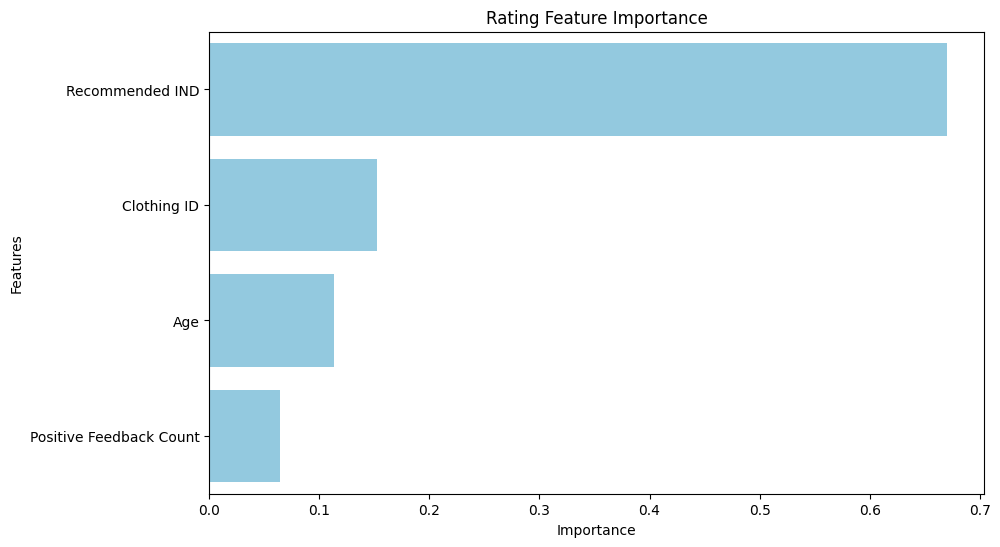

In [ ]:
# Rating Feature
X = df_vis.drop('Rating', axis=1)
y = df_vis['Rating']

# Create a Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for feature importances
df_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance
df_importance = df_importance.sort_values('Importance', ascending=False)

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importance, orient='h', color='skyblue')
plt.title('Rating Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


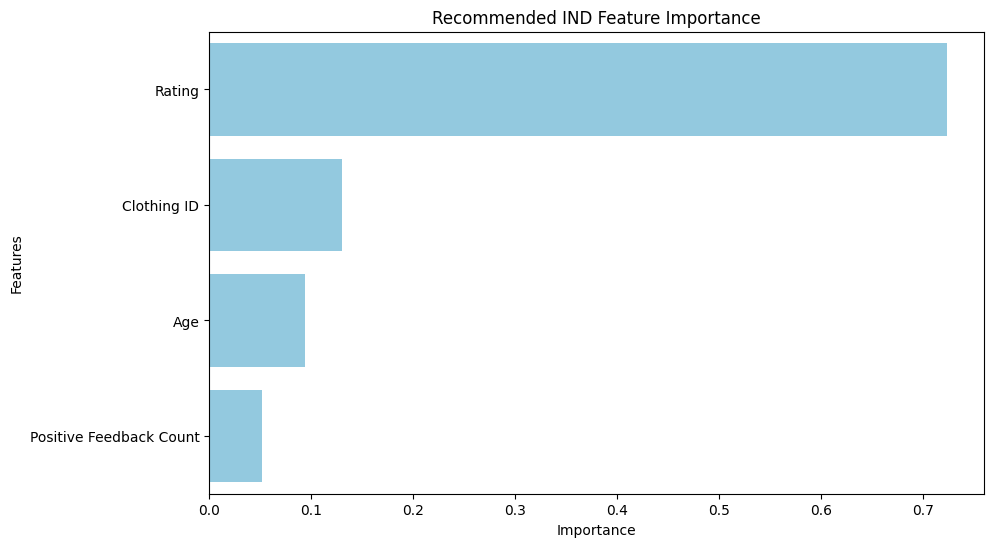

In [ ]:
# Recommended IND Feature
X = df_vis.drop('Recommended IND', axis=1)
y = df_vis['Recommended IND']

# Fit the model
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for feature importances
df_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance
df_importance = df_importance.sort_values('Importance', ascending=False)

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importance, orient='h',  color='skyblue')
plt.title('Recommended IND Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

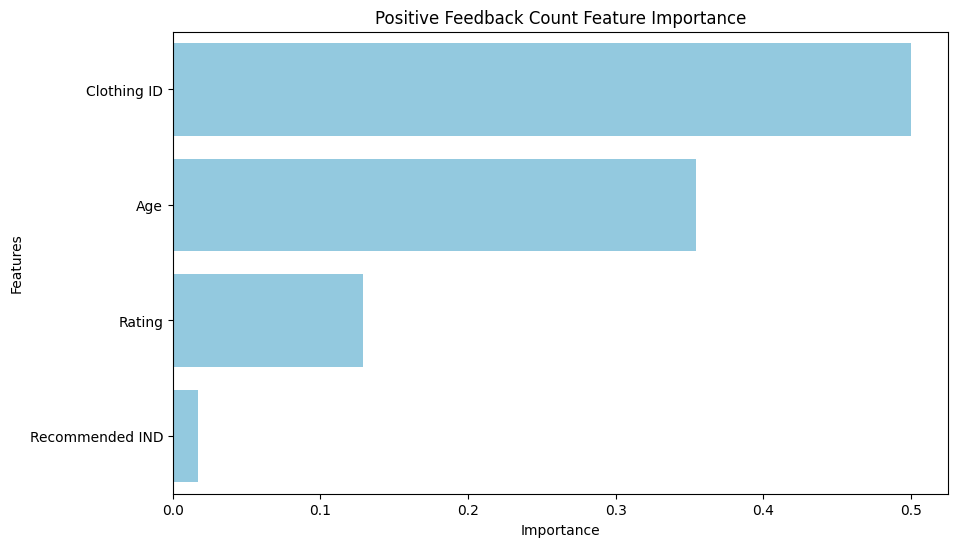

In [ ]:
# Positive Feedback Count Feature
X = df_vis.drop('Positive Feedback Count', axis=1)
y = df_vis['Positive Feedback Count']

# Fit the model
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for feature importances
df_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance
df_importance = df_importance.sort_values('Importance', ascending=False)

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importance, orient='h', color='skyblue')
plt.title('Positive Feedback Count Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
# First, change the type of the specified columns to "category". This will
# assign a "code" to each unique category value.
data_df["Clothing ID"] = data_df["Clothing ID"].astype('category')
data_df["Division Name"] = data_df["Division Name"].astype('category')
data_df["Department Name"] = data_df["Department Name"].astype('category')
data_df["Class Name"] = data_df["Class Name"].astype('category')

# Second, replace the strings with their code values.
data_df["Clothing ID"] = data_df["Clothing ID"].cat.codes
data_df["Division Name"] = data_df["Division Name"].cat.codes
data_df["Department Name"] = data_df["Department Name"].cat.codes
data_df["Class Name"] = data_df["Class Name"].cat.codes


In [ ]:
# Cast the numerical features to floats.
data_df["Age"] = data_df["Age"].astype('float')
data_df["Rating"] = data_df["Rating"].astype('float')
data_df["Positive Feedback Count"] = data_df["Positive Feedback Count"].astype('float')

data_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1,0.0,2,2,5
1,1080,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1,4.0,0,1,3
2,1077,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0,0.0,0,1,3
3,1049,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1,0.0,1,0,13
4,847,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1,6.0,0,4,0


In [ ]:
# Retrieve the labels for each of the splits.
y_train = data_df["Recommended IND"].iloc[train_idx]
y_val = data_df["Recommended IND"].iloc[val_idx]
y_test = data_df["Recommended IND"].iloc[test_idx]

# Before selecting the inputs, remove text columns and the labels.
data_df = data_df.drop(columns=["Clothing ID","Title", "Review Text"])

# Select the inputs for the different splits.
X_train = data_df.iloc[train_idx]
X_val = data_df.iloc[val_idx]
X_test = data_df.iloc[test_idx]

X_train.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
6707,27.0,5.0,1,0.0,0,4,8
10232,34.0,4.0,1,1.0,0,4,8
13532,69.0,4.0,1,3.0,0,0,15
9230,48.0,5.0,1,1.0,0,1,3
20364,47.0,5.0,1,1.0,1,1,3


## Part 2

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# List of models
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("KNN", KNeighborsRegressor()),
    ("Naive Bayes", GaussianNB()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),  # Increase max_iter
    ("SVM", SVR())
]

# Apply each model
for name, model in models:
    # Fit the model
    model.fit(X_train_scaled, y_train)  # Use scaled data

    # Make predictions on the training set
    y_pred_train = model.predict(X_train_scaled)  # Use scaled data

    # Calculate the mean squared error on the training set
    mse_train = mean_squared_error(y_train, y_pred_train)

    # Print the MSE for the training set
    print(f"{name} Training MSE: {mse_train}")

    # Make predictions on the validation set
    y_pred_val = model.predict(X_val_scaled)  # Use scaled data

    # Calculate the mean squared error on the validation set
    mse_val = mean_squared_error(y_val, y_pred_val)

    # Print the MSE for the validation set
    print(f"{name} Validation MSE: {mse_val}")


Linear Regression Training MSE: 2.2207181859239575e-31
Linear Regression Validation MSE: 2.301561745874469e-31
Decision Tree Training MSE: 0.0
Decision Tree Validation MSE: 0.0
KNN Training MSE: 8.516074089844582e-05
KNN Validation MSE: 1.7035775127768315e-05
Naive Bayes Training MSE: 0.0
Naive Bayes Validation MSE: 0.0
Logistic Regression Training MSE: 0.0
Logistic Regression Validation MSE: 0.0
SVM Training MSE: 0.002506580384105429
SVM Validation MSE: 0.002654898941552353


In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# List of models
models = [
    ("Random Forest (Bagging)", RandomForestRegressor()),
    ("AdaBoost (Boosting)", AdaBoostRegressor()),
    ("Gradient Boosting (Boosting)", GradientBoostingRegressor())
]

# Apply each model
for name, model in models:
    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Fit the model
    model.fit(X_train_scaled, y_train)  # Use scaled data

    # Make predictions on the training set
    y_train_pred = model.predict(X_train_scaled)

    # Calculate the mean squared error on the training set
    mse_train = mean_squared_error(y_train, y_train_pred)

    # Print the MSE for the training set
    print(f"{name} Training MSE: {mse_train}")

Random Forest (Bagging) Training MSE: 0.0
AdaBoost (Boosting) Training MSE: 0.0
Gradient Boosting (Boosting) Training MSE: 1.0181132194863817e-10


## Part 3

In [ ]:
print(X_train_scaled.shape)

(18788, 7)


In [ ]:
print(X_train_scaled)

[[-1.32086951  0.72065353  0.46040487 ... -0.76886155  1.00716247
   0.20889115]
 [-0.75030976 -0.18500791  0.46040487 ... -0.76886155  1.00716247
   0.20889115]
 [ 2.102489   -0.18500791  0.46040487 ... -0.76886155 -1.44569494
   1.55498985]
 ...
 [ 0.0647756  -1.09066935  0.46040487 ... -0.76886155 -0.83248059
  -0.75260792]
 [-0.34276708  0.72065353  0.46040487 ...  0.85750309 -0.83248059
  -0.75260792]
 [ 0.22779267  0.72065353  0.46040487 ...  2.48386773 -0.21926624
   2.1318893 ]]


### FFNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
#Feed Forward Neural Network
model = Sequential()
model.add(Dense(X_train.shape[0], input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
588/588 [==============================] - 16s 26ms/step - loss: 0.0815 - accuracy: 0.9699 - val_loss: 5.1106e-04 - val_accuracy: 1.0000
Epoch 2/20
588/588 [==============================] - 16s 27ms/step - loss: 2.5395e-04 - accuracy: 1.0000 - val_loss: 1.2368e-04 - val_accuracy: 1.0000
Epoch 3/20
588/588 [==============================] - 15s 25ms/step - loss: 7.8074e-05 - accuracy: 1.0000 - val_loss: 4.6286e-05 - val_accuracy: 1.0000
Epoch 4/20
588/588 [==============================] - 15s 26ms/step - loss: 3.1464e-05 - accuracy: 1.0000 - val_loss: 2.1887e-05 - val_accuracy: 1.0000
Epoch 5/20
588/588 [==============================] - 16s 27ms/step - loss: 1.4733e-05 - accuracy: 1.0000 - val_loss: 1.0063e-05 - val_accuracy: 1.0000
Epoch 6/20
588/588 [==============================] - 17s 29ms/step - loss: 7.5554e-06 - accuracy: 1.0000 - val_loss: 5.4705e-06 - val_accuracy: 1.0000
Epoch 7/20
588/588 [==============================] - 16s 27ms/step - loss: 4.2249e-06 - acc

In [ ]:
y_pred_ffnn = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ffnn)
print("MSE of Feed Forward Neural Network", mse)

74/74 [==============================] - 0s 5ms/step
MSE of Feed Forward Neural Network 2.1504778333899197e-14


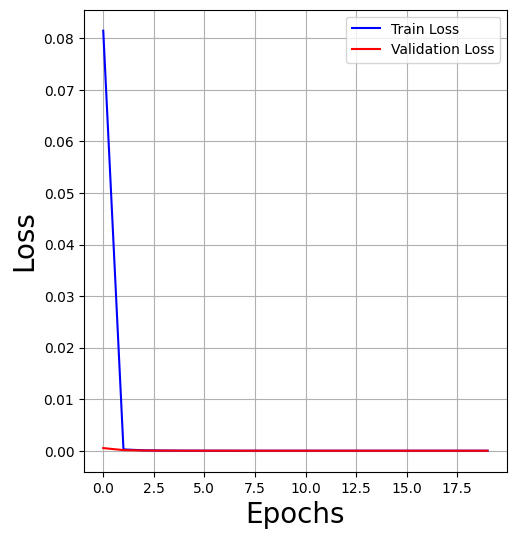

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], c='b', label = 'Train Loss')
plt.plot(history.history['val_loss'], c='r', label = 'Validation Loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.show()

### RNN

In [ ]:
#Recurrent Neural Network
from keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))  # RNN layer
model.add(SimpleRNN(50, activation='relu'))  # Second RNN layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data = (X_val, y_val))


In [ ]:
y_pred_rnn = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rnn)
print("MSE of Recurrent Neural Network", mse)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], c='b', label = 'Train Loss')
plt.plot(history.history['val_loss'], c='r', label = 'Validation Loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.show()

## Part 4

### Applying overfitting prevention technique

In [ ]:
#Overfitting prevention technique

from keras.layers import Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

#FFNN

# Initialize the constructor
model = Sequential()

# Add an input layer with L2 regularization
model.add(Dense(X_train.shape[0], activation='relu', input_dim=7, kernel_regularizer=l2(0.01)))

# Add a hidden layer with dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Add batch normalization layer
model.add(BatchNormalization())

# Add an output layer
model.add(Dense(1, activation='sigmoid'))

# Set up early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/50
588/588 [==============================] - 18s 28ms/step - loss: 0.4629 - accuracy: 0.8097 - val_loss: 0.4613 - val_accuracy: 0.8066
Epoch 2/50
588/588 [==============================] - 16s 27ms/step - loss: 0.4123 - accuracy: 0.8267 - val_loss: 0.4925 - val_accuracy: 0.8066
Epoch 3/50
588/588 [==============================] - 16s 27ms/step - loss: 0.2642 - accuracy: 0.9074 - val_loss: 0.1996 - val_accuracy: 0.9996
Epoch 4/50
588/588 [==============================] - 16s 28ms/step - loss: 0.1688 - accuracy: 0.9582 - val_loss: 0.0824 - val_accuracy: 0.9996
Epoch 5/50
588/588 [==============================] - 18s 30ms/step - loss: 0.1726 - accuracy: 0.9406 - val_loss: 0.0945 - val_accuracy: 0.9987
Epoch 6/50
588/588 [==============================] - 17s 29ms/step - loss: 0.1772 - accuracy: 0.9319 - val_loss: 0.0720 - val_accuracy: 1.0000
Epoch 7/50
588/588 [==============================] - 18s 30ms/step - loss: 0.2162 - accuracy: 0.8833 - val_loss: 0.1146 - val_accuracy:

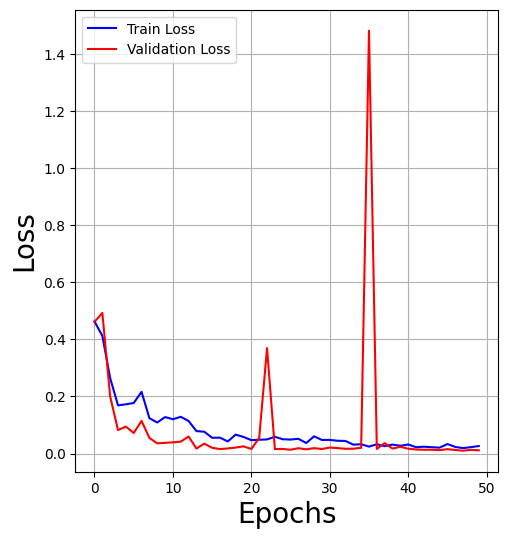

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], c='b', label = 'Train Loss')
plt.plot(history.history['val_loss'], c='r', label = 'Validation Loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.show()

In [ ]:
#Recurrent Neural Networks

# Initialize the constructor
model = Sequential()

# Add an input layer with L2 regularization
model.add(SimpleRNN(64, activation='tanh', input_shape=(X_train.shape[1], 1), return_sequences=True, kernel_regularizer=l2(0.01)))

# Add a hidden layer with dropout
model.add(SimpleRNN(50, activation='relu'))  # Second RNN layer
model.add(Dropout(0.5))

# Add batch normalization layer
model.add(BatchNormalization())

# Add an output layer
model.add(Dense(1, activation='sigmoid'))

# Set up early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[es])


Epoch 1/50
588/588 [==============================] - 7s 7ms/step - loss: 0.0736 - accuracy: 0.9869 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 2/50
588/588 [==============================] - 4s 6ms/step - loss: 0.0086 - accuracy: 0.9998 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 3/50
588/588 [==============================] - 4s 7ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4/50
588/588 [==============================] - 4s 7ms/step - loss: 0.0084 - accuracy: 0.9985 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 5/50
588/588 [==============================] - 4s 6ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 9.0744e-04 - val_accuracy: 1.0000
Epoch 6/50
588/588 [==============================] - 3s 6ms/step - loss: 0.0052 - accuracy: 0.9988 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/50
588/588 [==============================] - 4s 8ms/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 0.0012 - val_accuracy: 1.0000
Ep

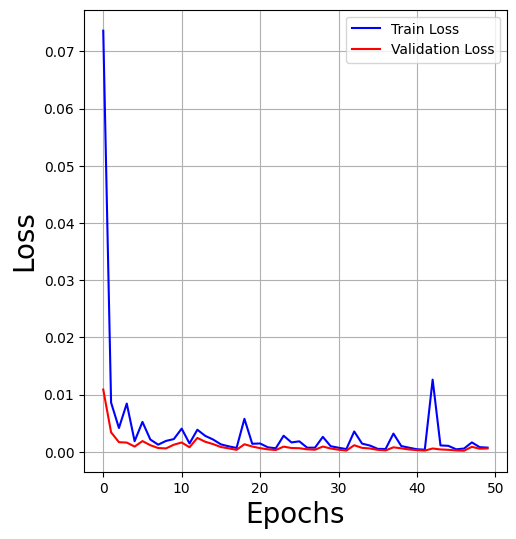

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], c='b', label = 'Train Loss')
plt.plot(history.history['val_loss'], c='r', label = 'Validation Loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.show()

Linear Regression: You can add a regularization term to the loss function to prevent overfitting. In sklearn, you can use Ridge for L2 regularization or Lasso for L1 regularization.

Decision Tree: You can limit the depth of the tree (max_depth), set a minimum number of samples required to split an internal node (min_samples_split), or set a minimum number of samples required to be at a leaf node (min_samples_leaf) to prevent overfitting.

KNN: Choosing the right value for k is crucial to prevent overfitting. Cross-validation can be helpful to find the optimal k.

Naive Bayes: Naive Bayes is less prone to overfitting compared to other models. However, you can still use cross-validation to tune the parameters.

Logistic Regression: Similar to Linear Regression, you can add a regularization term to the loss function to prevent overfitting. In sklearn, you can adjust the C parameter which is the inverse of regularization strength.

SVM: You can use the C parameter to control the trade-off between achieving a low error on the training data and minimizing the norm of the weights. A smaller C creates a wider margin but allows more misclassifications.


In [ ]:
#Random Forest Regressor (Ensemble Learning)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4, 6, 8],
}

rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
history = grid_search_rf.fit(X_train, y_train)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200]
}

ab = AdaBoostRegressor()
grid_search_ada = GridSearchCV(estimator=ab, param_grid=param_grid, cv=5)
grid_search_ada.fit(X_train, y_train)

In [ ]:
#Gradient Boosting Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

gb = GradientBoostingRegressor()
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5)
grid_search_gb.fit(X_train, y_train)

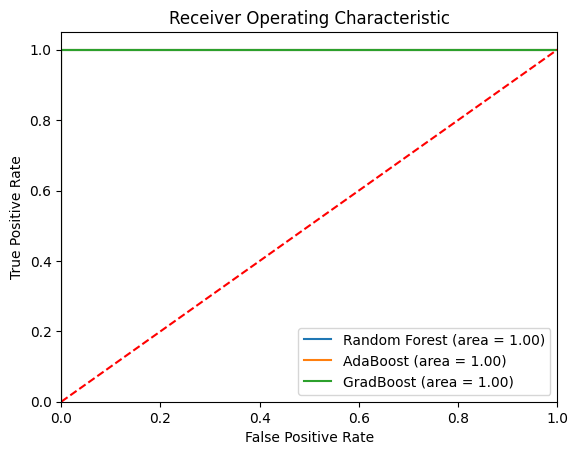

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for Random Forest
rf_pred = grid_search_rf.predict(X_test)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Compute ROC curve and ROC area for AdaBoost
ab_pred = grid_search_ada.predict(X_test)
ab_fpr, ab_tpr, _ = roc_curve(y_test, ab_pred)
ab_roc_auc = auc(ab_fpr, ab_tpr)

# Compute ROC curve and ROC area for AdaBoost
gb_pred = grid_search_gb.predict(X_test)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_pred)
gb_roc_auc = auc(gb_fpr, gb_tpr)


plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(ab_fpr, ab_tpr, label='AdaBoost (area = %0.2f)' % ab_roc_auc)
plt.plot(gb_fpr, gb_tpr, label='GradBoost (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Part 5

**Here is our result before apply overfitting technique:**

MSE of Recurrent Neural Network 0.00031522816255823925

MSE of Feed Forward Neural Network 0.24184707239558825

Random Forest (Bagging) Training MSE: 0.0

AdaBoost (Boosting) Training MSE: 0.0

Gradient Boosting (Boosting) Training MSE: 1.0290598273633982e-10

Linear Regression Training MSE: 7.03664357828884e-32

Decision Tree Training MSE: 0.0

KNN Training MSE: 5.748350010645093e-05

Naive Bayes Training MSE: 0.0

Logistic Regression Training MSE: 0.0

SVM Training MSE: 0.0024173057232355975

#### Analysis Result

The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. The smaller the MSE, the closer the fit is to the data. In other words, the smaller the number, the better the model has performed.

Recurrent Neural Network (RNN): The MSE is very small, which indicates that this model has performed well.

Feed Forward Neural Network (FFNN): The MSE is larger compared to the RNN, which suggests that this model is not as good as RNN.

Random Forest, AdaBoost, Decision Tree, Naive Bayes, Logistic Regression: The training MSE for these models is 0, which might suggest that they are overfitting the training data. Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.

Gradient Boosting: The training MSE is extremely small, almost zero, which is a good sign. But it might be a sign of overfitting.

Linear Regression: The training and validation MSEs are extremely small, which suggests that this model has performed very well on both the training data and the validation data.

K-Nearest Neighbors (KNN): The training and validation MSEs are small, but not as small as some of the other models. This suggests that the model is performing reasonably well, but there might be room for improvement.

Support Vector Machine (SVM): The training and validation MSEs are larger than some of the other models, which suggests that this model might not be performing as well.